In [2]:
# pandas 관련 import  
import pandas as pd  # 데이터프레임 및 데이터 처리 관련 기능 제공  

# plotly 관련 import
import plotly.express as px  # 인터랙티브 시각화 (예: scatter, bar 등) 생성  

# 데이터프레임 로딩 관련 import
from module.df.data_loader import get_gender_year_df  # 성별-연도별 집계 데이터 로딩

# 성별 키워드 순서 지정  
gender_order = [
    "male",  # 남성
    "female",  # 여성
    "feminist",  # 페미니스트
    "queer",  # 퀴어
    "others"  # 기타 성별
]

# 성별-연도별 공격성 댓글 수 집계 데이터를 로딩  
gender_year_counts = get_gender_year_df()
print(gender_year_counts.shape)  # 데이터 확인용 출력
display(gender_year_counts.head())  # 상위 5개 행 미리보기

# 성별(gender)와 연도(year)에 따른 공격성 댓글 수를 막대그래프로 시각화  
fig = px.bar(
    gender_year_counts,  # 시각화에 사용할 데이터프레임
    x="gender",  # x축: 성별
    y="count",  # y축: 공격성 댓글 수
    color="year",  # 색상 구분 기준: 연도
    barmode="group",  # 막대그래프를 그룹형으로 표시
    text="count",  # 각 막대 위에 표시할 수치
    title="Offensive Comments Targeting Gender Groups by Year",  # 그래프 제목
    category_orders={"gender": gender_order}  # 성별 항목의 표시 순서 지정
)

# 각 막대 위에 레이블(수치)를 막대 바깥쪽에 표시하고, 텍스트 형식 지정  
fig.update_traces(textposition='outside', texttemplate='%{text}')

# 레이아웃 설정  
fig.update_layout(
    xaxis_title="Gender",  # x축 제목
    yaxis_title="Count",  # y축 제목
    uniformtext_minsize=8,  # 텍스트 최소 크기 설정
    yaxis_type="log",  # y축을 로그 스케일로 설정
    uniformtext_mode='hide',  # 텍스트가 잘릴 경우 숨김 처리
    title_x=0.5  # 제목을 가로축 중앙에 정렬
)

# 그래프 표시  
fig.show(config={
    'displayModeBar': False,  # 상단 모드바 숨김
    'scrollZoom': False,  # 마우스 스크롤 줌 비활성화
    'displaylogo': False,  # Plotly 로고 숨김
    'editable': False,  # 그래프 요소 편집 비활성화
    'showAxisDragHandles': False  # 축 드래그 핸들 비활성화
})

(14, 3)


,count,gender,year
0,97,others,2021
1,2,feminist,2020
2,31,female,2020
3,527,male,2021
4,1,queer,2020


In [3]:
# pandas 관련 import
import pandas as pd  # 데이터프레임 및 데이터 처리 관련 기능 제공

# plotly 관련 import
import plotly.express as px  # 인터랙티브 시각화 (예: scatter, bar 등) 생성

# 데이터프레임 로딩 관련 import
from module.df.data_loader import get_politics_year_df  # 정치 성향-연도별 집계 데이터 로딩

# 파이프라인 실행 결과를 데이터프레임으로 로드
politics_year_counts = get_politics_year_df()

# 각 연도별 총 공격성 댓글 수를 계산하여 동일한 길이로 반환
total_counts_by_year = politics_year_counts.groupby("year")["count"].transform("sum")

# 각 정치 성향의 비율(%)을 계산하여 'percentage' 열에 저장
politics_year_counts["percentage"] = politics_year_counts["count"] / total_counts_by_year * 100

# 연도별 정치 성향에 따른 공격성 댓글 분포를 도넛형 파이 차트로 시각화
fig = px.pie(
    politics_year_counts,  # 시각화에 사용할 데이터프레임
    names="politics",  # 각 조각의 이름: 정치 성향
    values="count",  # 각 조각의 크기: 댓글 수
    color="politics",  # 색상 구분 기준: 정치 성향
    facet_col="year",  # 연도별로 그래프 분할(facet)
    title="Comparison of Offensive Comments Based on Political Views by Year",  # 그래프 제목
    color_discrete_map={  # 정치 성향별 색상 지정
        "conservative": "red",  # 보수: 빨간색
        "progressive": "blue",  # 진보: 파란색
        "others": "gray"  # 기타: 회색
    },
    hole=0.3,  # 도넛 차트로 표시
    labels={"percentage": "%", "count": "Count"}  # 레이블 표시 형식
)

# 각 파이 조각에 퍼센트와 레이블(정치 성향)을 함께 표시
fig.update_traces(textinfo="percent+label")

# 레이아웃 설정: 텍스트 스타일, 제목 정렬, 범례 설정 등 구성
fig.update_layout(
    uniformtext_minsize=8,  # 텍스트 최소 크기 설정
    uniformtext_mode='hide',  # 텍스트가 너무 작으면 숨김
    title_x=0.5,  # 제목을 가운데 정렬
    legend=dict(  # 범례 설정
        itemsizing='constant',  # 범례 항목 크기 고정
        traceorder='normal',  # 범례 항목 순서는 데이터 순서 그대로
        itemdoubleclick='toggle',  # 더블클릭 시 해당 항목만 표시
        tracegroupgap=0,  # 범례 그룹 간 간격 없음
        itemwidth=30  # 범례 항목 너비 설정
    )
)

# 그래프 출력
fig.show()


In [4]:
# pandas 관련 import
import pandas as pd

# plotly 관련 import
import plotly.graph_objects as go # 커스터마이징 가능한 시각화 객체 제공

# 데이터프레임 로딩 관련 import 
from module.df.data_loader import get_race_year_df  # 인종-연도별 집계 데이터 로딩 

# 인종-연도별 집계 데이터프레임 로딩
df = get_race_year_df()

# count 값을 실수형(float)으로 변환 (정확한 비율 계산을 위함)
df["count"] = df["count"].astype(float)

# 연도별 전체 댓글 수 대비 비율(%)을 계산하여 'percentage' 열에 저장
df["percentage"] = df.groupby("year")["count"].transform(lambda x: x / x.sum() * 100)

# 히트맵 시각화를 위한 비율(percentage) 피벗 테이블 생성 (행: 인종, 열: 연도, 값: 비율)
z = df.pivot(index="race", columns="year", values="percentage").fillna(0)

# 라벨 텍스트 출력을 위한 count 피벗 테이블 생성 (행: 인종, 열: 연도, 값: 댓글 수)
counts = df.pivot(index="race", columns="year", values="count").fillna(0)

# 텍스트 라벨을 저장할 빈 DataFrame 생성 (x와 동일한 인덱스/컬럼 구조)
text = pd.DataFrame(index=z.index, columns=z.columns)

# 각 셀마다 race, percentage, count 정보를 조합해 텍스트 레이블 생성
for row in z.index:
    for col in z.columns:
        pct = z.loc[row, col] # 비율 값
        cnt = counts.loc[row, col] # 댓글 수
        # 예: "asian<br>32.1% (45)"
        text.loc[row, col] = f"{row}<br>{pct:.1f}% ({int(cnt)})"

# 히트맵 시각화 생성
fig = go.Figure(
    data=go.Heatmap(
        z=z.values, # 색상에 대응되는 값 (비율 %)
        x=z.columns, # x축 항목: 연도
        y=z.index, # y축 항목: 인종
        text=text.values, # 각 셀에 표시할 텍스트 (race + 비율 + 개수)
        texttemplate="%{text}", # text 값을 그대로 셀에 출력
        colorscale="YlOrRd", # 색상 스케일 설정 (밝은 노랑 → 짙은 빨강)
        hovertemplate="Year: %{x}<br>Race: %{y}<br>%{z:.1f}%<extra></extra>" # 마우스 오버 시 표시될 정보
    )
)

# 레이아웃 설정
fig.update_layout(
    title="Percentage of Offensive Comments by Race per Year", # 그래프 제목 설정
    xaxis_title="Year", # x축 제목: 연도
    yaxis_title="Race", # y축 제목: 인종
    title_x=0.5, # 제목을 수평 중앙 정렬
    uniformtext_minsize=8, # 텍스트 최소 크기 설정
    uniformtext_mode='hide' # 텍스트가 너무 작으면 숨김 처리
)

# 그래프 출력
fig.show()

In [5]:
from collections import Counter
import pandas as pd
import plotly.express as px
import re
from module.db.db_connection import get_collection

collection = get_collection()

# GRP 필드 추출
target_groups = []
for doc in collection.find({}, {"GRP": 1}):
    tg = doc.get("GRP", None)
    if isinstance(tg, str):
        target_groups.append(tg)

# 정규표현식으로 분리
pattern = re.compile(r"^(gender|race|politics|religion|others)[-_](.+)$", re.IGNORECASE)
data = []

for tg in target_groups:
    match = pattern.match(tg)
    if match:
        category = match.group(1)
        subgroup = match.group(2)
    else:
        category = "others"
        subgroup = tg
    data.append((category, subgroup))

# 카운트
df = pd.DataFrame(data, columns=['category', 'subgroup'])
df = df.value_counts().reset_index(name='count')

# 트리맵 시각화
fig = px.treemap(
    df,
    path=['category', 'subgroup'],
    values='count',
    color='offensive_score',
    color_continuous_scale='Viridis',
    title='Target Group Treemap',
    hover_data=['count']
)

fig.update_traces(
    tiling=dict(packing="squarify"),
    textinfo="label+value"
)

# ✅ 높이 크게 지정해서 가로길이와 균형 맞추기
fig.update_layout(
    width=800,
    height=800,  # 핵심: 이 높이를 늘리면 가로로 퍼지는 현상 완화됨
    margin=dict(t=60, l=20, r=20, b=20),
    uniformtext=dict(minsize=10, mode='hide'),
    title_font_size=20
)

fig.show()


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['category', 'subgroup', 'count'] but received: offensive_score

In [6]:
# 1. offensive_score 포함된 문서만 가져오기
collection = get_collection()  # 이미 OFF=True, GRP!=None, offensive_score 존재하는 데이터만 반환

data = []
pattern = re.compile(r"^(gender|race|politics|religion|others)[-_](.+)$", re.IGNORECASE)

for doc in collection.find({}, {"GRP": 1, "offensive_score": 1}):
    tg = doc.get("GRP")
    score = doc.get("offensive_score", 0)
    
    if isinstance(tg, str):
        match = pattern.match(tg)
        if match:
            category = match.group(1)
            subgroup = match.group(2)
        else:
            category = "others"
            subgroup = tg
        
        data.append((category, subgroup, score))

# 2. DataFrame으로 변환
df = pd.DataFrame(data, columns=["category", "subgroup", "offensive_score"])

# 3. 카운트 + 평균 offensive_score 집계
agg_df = df.groupby(["category", "subgroup"]).agg(
    count=("offensive_score", "count"),
    offensive_score=("offensive_score", "mean")  # 평균 점수 사용
).reset_index()

# 4. 트리맵 시각화
fig = px.treemap(
    agg_df,
    path=['category', 'subgroup'],
    values='count',
    color='offensive_score',
    color_continuous_scale='YlOrRd',
    title='Target Group Treemap (colored by offensive score)',
    hover_data=['count', 'offensive_score']
)


fig.update_traces(
    tiling=dict(packing="squarify"),
    textinfo="label+value"
)

fig.update_layout(
    width=1000,
    height=1000,
    margin=dict(t=60, l=20, r=20, b=20),
    uniformtext=dict(minsize=10, mode='hide'),
    title_font_size=20
)

fig.show()


In [15]:
import pandas as pd
import plotly.express as px

# 데이터 로딩 및 전처리
from module.df.data_loader import get_target_group_df
df = get_target_group_df()

# 2. 에러 방지: 빈 subgroup 제거
df = df[df['subgroup'].notna()]
df = df[df['subgroup'].str.strip() != ""]

fig = px.treemap(
    df,
    path=['category', 'subgroup'],
    values='count',
    color='offensive_score',
    color_continuous_scale='YlOrRd',
    title='Target Group Treemap (colored by offensive score)',
    hover_data=['count', 'offensive_score']
)

fig.update_traces(
    tiling=dict(packing="squarify"),
    textinfo="label+value",
    textfont=dict(size=25) 
)

fig.update_layout(
    width=1000,
    height=1000,
    margin=dict(t=60, l=20, r=20, b=20),
    # uniformtext=dict(minsize=10, mode='hide'),
    title_font_size=20
)

fig.show()


   count   religion
0     17   buddhism
1    518  christian
2   1059      islam
3     57   catholic


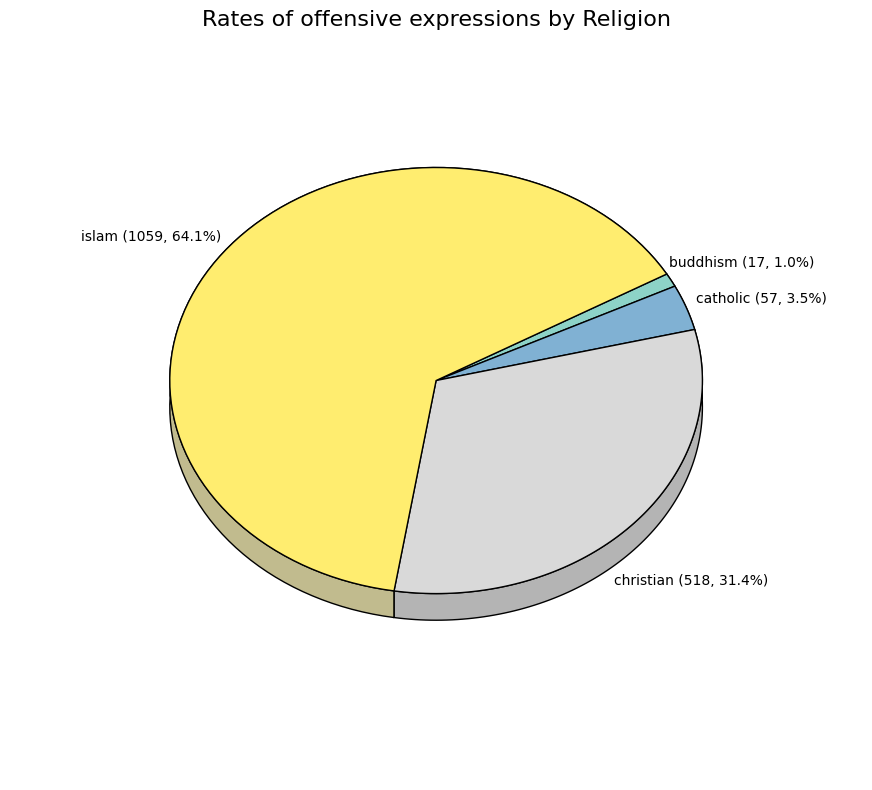

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from matplotlib import cm

# 데이터 로딩 및 전처리
from module.df.data_loader import get_religion_df


df = get_religion_df()

print(df.head())

df["count"] = df["count"].astype(float)
race_summary = df.groupby("religion")["count"].sum().reset_index()

labels = race_summary["religion"].tolist()
sizes = race_summary["count"].tolist()
total = sum(sizes)
colors = cm.Set3(np.linspace(0, 1, len(sizes)))

# 설정
depth = 0.1       # 입체 깊이
squash = 0.8      # y 스케일 압축 (기울기)
theta1 = 30       # 시작 각도

# 차트 초기화
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')

for i, size in enumerate(sizes):
    # 각도 계산
    theta2 = theta1 - (size / total) * 360
    # 촘촘한 각도 분할 (해결 핵심)
    theta = np.linspace(theta1, theta2, 100)

    # 윗면: 타원형 부채꼴 조각 (기울어진 시점에서의 파이차트)
    x_top = np.concatenate([[0], np.cos(np.deg2rad(theta)), [0]])
    y_top = np.concatenate([[0], np.sin(np.deg2rad(theta)) * squash, [0]])
    top_patch = np.vstack([x_top, y_top]).T

    # 아래면: 윗면을 depth만큼 아래로 내린 형태
    x_bottom = x_top
    y_bottom = y_top - depth
    # 아래면은 윗면을 정확히 뒤집은 형태로 생성
    bottom_patch = np.vstack([x_top, y_top - depth]).T

    # 옆면 다각형: 윗면 테두리 + 아래면 테두리를 역순으로 정확히 연결
    side_poly = np.vstack([top_patch[1:-1], bottom_patch[1:-1][::-1]])
    ax.add_patch(Polygon(side_poly, closed=True, facecolor=np.array(colors[i]) * 0.6,
                        edgecolor='black', linewidth=1))

    # 마지막에 반드시 윗면을 한 번 더 덮어줘야 겹침 방지
    ax.add_patch(Polygon(top_patch, closed=True,
                        facecolor=colors[i], edgecolor='black', linewidth=1, zorder=3))

    # 라벨 배치
    mid_angle = (theta1 + theta2) / 2
    mid_rad = np.deg2rad(mid_angle)
    x_text = 1.3 * np.cos(mid_rad)
    y_text = 1.3 * np.sin(mid_rad) * squash - depth / 2
    percentage = sizes[i] / total * 100
    count = int(sizes[i])
    ax.text(
        x_text,
        y_text,
        f"{labels[i]} ({count}, {percentage:.1f}%)",
        ha='center',
        va='center',
        fontsize=10
    )

    theta1 = theta2

# 마무리 시각 설정
ax.set_xlim(-1.6, 1.6)
ax.set_ylim(-1.5, 1.3)
ax.set_title("Rates of offensive expressions by Religion", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# 데이터 로딩 및 전처리
from module.df.data_loader import get_target_score_bin_df

df = get_target_score_bin_df()

# TGT 정렬
TGT_order = ["group", "individual", "untargeted", "other"]
df = df[df["TGT"].isin(TGT_order)].copy()
df["TGT"] = pd.Categorical(df["TGT"], categories=TGT_order, ordered=True)

# ✅ offensive_score를 구간화 (0.1 단위)
bins = np.arange(0, 1.1, 0.1)
labels = [f"{round(bins[i], 1)}~{round(bins[i+1], 1)}" for i in range(len(bins)-1)]
df["score_bin"] = pd.cut(df["offensive_score"], bins=bins, labels=labels, include_lowest=True)

# # ✅ Aggregation: TGT × score_bin 별 document 수 count
# agg_df = df.groupby(["TGT", "score_bin"]).size().reset_index(name="count")

# # ✅ 누락된 조합 채워주기 (0 count 포함)
# agg_df = agg_df.pivot(index="TGT", columns="score_bin", values="count").fillna(0).reset_index()
# agg_df = pd.melt(agg_df, id_vars=["TGT"], var_name="score_bin", value_name="count")

# ✅ 컬러 매핑 (score_bin 별 색상)
color_map = px.colors.sequential.RdBu[::-1]  # red→blue
color_discrete_map = {label: color_map[i] for i, label in enumerate(labels)}

# ✅ 시각화 (score_bin을 색상으로, count를 y축으로)
fig = px.bar(
    df,
    x="count",              # ✅ x → count
    y="TGT",                # ✅ y → TGT (이제 막대가 수평 방향으로)
    color="score_bin",
    color_discrete_map=color_discrete_map,
    orientation="h",        # ✅ 수평 막대 그래프임을 명시
    labels={"count": "Document Count", "TGT": "Target Group (TGT)", "score_bin": "Score Range"},
    title="Binned Offensive Score Distribution by TGT (Horizontal)"
)

fig.update_layout(
    xaxis_title="Document Count (aggregated)",  # ✅ x축은 count
    yaxis_title="Target (TGT)",                 # ✅ y축은 TGT
    legend_title="Offensive Score Bin",
    barmode="stack",
    legend=dict(font=dict(size=14)),
    font=dict(size=14)
)

fig.show()

[{'$project': {'news_title': '$title', 'comment_text': '$comment', 'target_type': '$TGT', 'target_group': '$GRP', 'offensive_phrase': '$OFF_span', 'offensive_score': '$offensive_score', 'date': '$date', 'OFF': 1, '_id': 0}}, {'$facet': {'group': [{'$match': {'OFF': True, 'target_type': 'group', 'offensive_score': {'$ne': None}}}, {'$bucket': {'groupBy': '$offensive_score', 'boundaries': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'default': 'other', 'output': {'count': {'$sum': 1}, 'target_type': {'$first': 'group'}}}}], 'individual': [{'$match': {'OFF': True, 'target_type': 'individual', 'offensive_score': {'$ne': None}}}, {'$bucket': {'groupBy': '$offensive_score', 'boundaries': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], 'default': 'other', 'output': {'count': {'$sum': 1}, 'target_type': {'$first': 'individual'}}}}], 'untargeted': [{'$match': {'OFF': True, 'target_type': 'untargeted', 'offensive_score': {'$ne': None}}}, {'$bucket': {'groupBy': '$offensive_score', 'boundaries': [0.0

NameError: name 'labels' is not defined